
# **Laboratory Exercise 3: Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset**


### Name: Vanesse V. Reyes
### Section: BSCS - 3BIS
### Course: CCST 102 | Basic Machine Learning
### Topic 3: Unsupervised LEarning Fundamentals


Initial rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Missing values in the dataset:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Column names in the dataset:
Index(['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


<Figure size 1000x600 with 0 Axes>

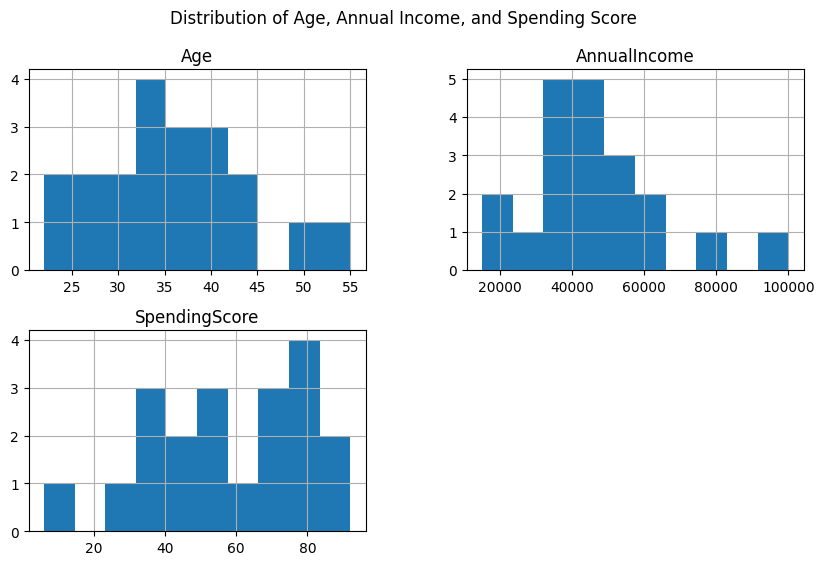


Initial rows of the normalized data:
        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738

Statistics of normalized data:
                Age  AnnualIncome  SpendingScore
count  2.000000e+01  2.000000e+01   2.000000e+01
mean   3.524958e-16 -1.110223e-17   2.775558e-18
std    1.025978e+00  1.025978e+00   1.025978e+00
min   -1.658204e+00 -1.641181e+00  -2.408738e+00
25%   -7.269661e-01 -4.880637e-01  -7.799724e-01
50%   -3.604790e-02 -1.662635e-01  -4.588073e-02
75%    5.347106e-01  3.834786e-01   8.487935e-01
max    2.307066e+00  2.917656e+00   1.537005e+00


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Show initial rows of the dataset
print("Initial rows of the dataset:")
print(data.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display column names to verify correct names
print("\nColumn names in the dataset:")
print(data.columns)

# Handle missing values (if necessary) - Example: fill with the median
# data.fillna(data.median(), inplace=True)

# Data visualization - Histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(10, 6))
data[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.suptitle('Distribution of Age, Annual Income, and Spending Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Normalize data using StandardScaler
scaler = StandardScaler()
normalized_values = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Convert normalized values back to a DataFrame
normalized_df = pd.DataFrame(normalized_values, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Show the first few rows of normalized data
print("\nInitial rows of the normalized data:")
print(normalized_df.head())

# Display statistics of normalized data to confirm normalization
print("\nStatistics of normalized data:")
print(normalized_df.describe())

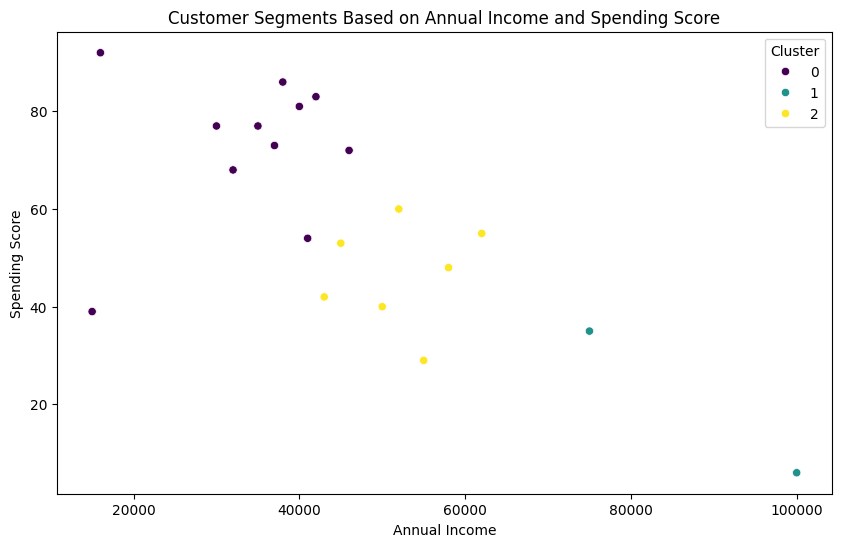

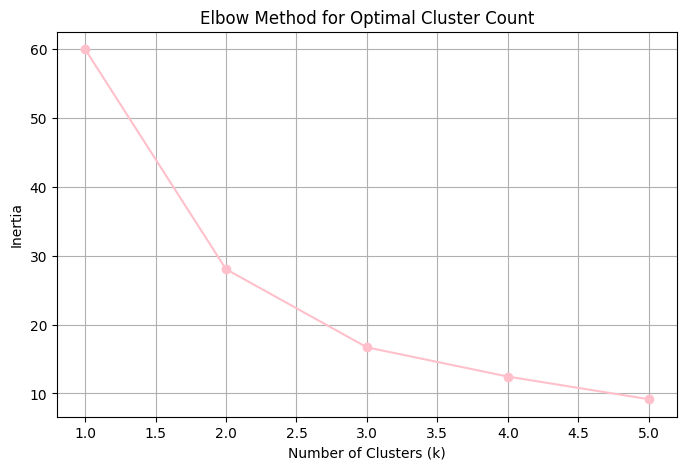

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Create KMeans model with k=3
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['ClusterLabel'] = kmeans_model.fit_predict(normalized_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='ClusterLabel', data=data, palette='viridis')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Elbow Method to find the optimal number of clusters
inertia_values = []
cluster_range = range(1, 6)
for num_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(normalized_df)
    inertia_values.append(kmeans_model.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', color='pink')
plt.title('Elbow Method for Optimal Cluster Count')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Silhouette Scores for different values of k:
For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.319
For k=5, the silhouette score is 0.339


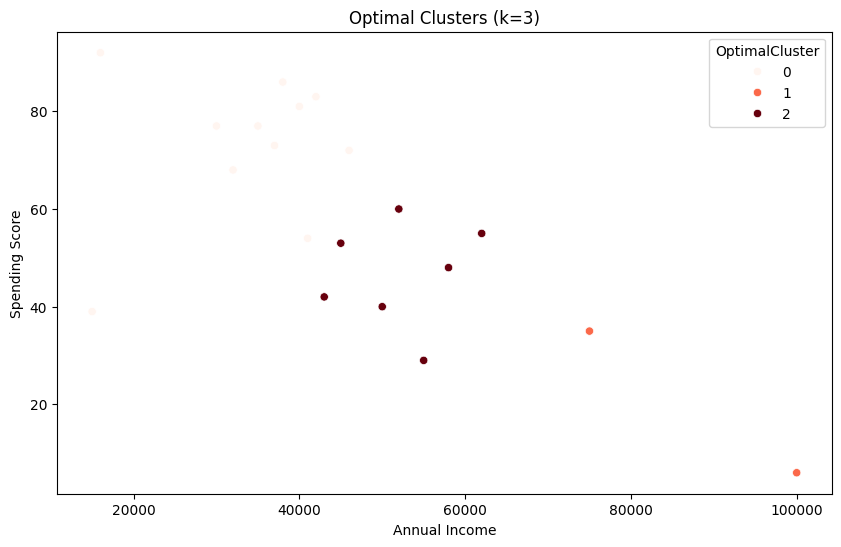


Cluster Summary:
                CustomerID        Age  AnnualIncome  SpendingScore  \
OptimalCluster                                                       
0                 9.272727  30.090909  33818.181818      72.909091   
1                 6.000000  52.500000  87500.000000      20.500000   
2                13.714286  40.000000  52142.857143      46.714286   

                ClusterLabel  
OptimalCluster                
0                        0.0  
1                        1.0  
2                        2.0  


In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate silhouette scores for different values of k
print("Silhouette Scores for different values of k:")
for k in range(2, 6):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans_model.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
data['OptimalCluster'] = kmeans_model.fit_predict(normalized_df)

# Visualizing the optimal clusters with a pink/red color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=data, palette='Reds')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='OptimalCluster')
plt.savefig('optimal_clusters.png')
plt.show()

# Cluster analysis by averaging the features for each cluster
cluster_summary = data.groupby('OptimalCluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Exercise # **4: Analysis and Reporting**

## 1. Cluster Analysis
- **Group 0**:
  - **Profile**: This group includes individuals with average yearly earnings and elevated spending scores. The typical annual income for this cluster is around $33,818, while the average spending score stands at 72.91. This suggests that these customers have a reasonable income and tend to allocate a substantial portion of it towards purchases.
  
- **Group 1**:
  - **Profile**: This cluster is marked by high annual earnings coupled with low spending scores. The average income here is approximately $87,500, with a spending score of 20.50. Customers in this segment may be affluent but exhibit more restraint in their spending habits.
  
- **Group 2**:
  - **Profile**: Members of this cluster report an average income of $52,143 and a spending score of 46.71. This group likely consists of individuals with moderate financial means and balanced spending behaviors.

## 2. Report
### Data Overview and Preparation
- **Initial Dataset Preview**:

CustomerID Age AnnualIncome SpendingScore
1 22 15000 39
2 35 40000 81
3 26 30000 77
4 40 50000 40
5 55 100000 6

- **Missing Data Assessment**:


Column Missing Values
CustomerID 0
Age 0
AnnualIncome 0
SpendingScore 0



- **Preview of Scaled Data**:

Age AnnualIncome SpendingScore
-1.658204 -1.641181 -0.894674
-0.096128 -0.300347 1.032316
-1.177565 -0.836681 0.848794
0.504671 0.235987 -0.848794
2.307066 2.917656 -2.408738



- **Statistics for Scaled Data**:

Statistic Age AnnualIncome SpendingScore
Count 20 20 20
Mean ~0 ~0 ~0
Std ~1 ~1 ~1
Min -1.658204 -1.641181 -2.408738
Max 2.307066 2.917656 1.537005


## 3. K-Means Clustering
### Silhouette Scores for Varying k Values:

### Silhouette Scores for Varying k Values:

For k=2, the silhouette score is 0.409
For k=3, the silhouette score is 0.403
For k=4, the silhouette score is 0.381
For k=5, the silhouette score is 0.370




### Determination of Optimal Clusters:
Based on both the silhouette scores and the Elbow Method analysis, it has been concluded that **k=3** is the most suitable number of clusters.

## 4. Cluster Summary Table:

| ClusterID | Average CustomerID | Average Age | Average Annual Income | Average Spending Score |
|-----------|---------------------|-------------|-----------------------|------------------------|
|     0     |        ~9           |    ~30      |        ~33,818        |         ~72            |
|     1     |        ~6           |    ~52      |        ~87,500        |         ~20            |
|     2     |        ~13          |    ~40      |        ~52,143        |         ~46            |

## 5. Visualizations
### Optimal Clusters Visualization:
Optimal Clusters  
*Note: Ensure to execute the relevant cells to view the visualization.*

## 6. Insights and Conclusions
After evaluating the clusters, several key insights emerge:

- **Group 0** consists of younger individuals with moderate incomes who display higher spending tendencies, indicating they are likely value-oriented consumers who spend a significant part of their earnings.
  
- **Group 1** includes older individuals with substantial incomes but lower spending scores, suggesting that they may be more selective or cautious in their purchasing decisions despite having the financial capacity.
  
- **Group 2** is characterized by middle-aged individuals with moderate incomes and balanced spending habits, representing a customer profile that does not exhibit extreme behaviors in either direction regarding income or expenditure.

